<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

In [3]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[df['genre'] == 'Rock'].describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,137.0,137.000000,136.000000,134.000000,131.000000,127.000000,123.000000,119.000000,115.000000,111.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,76.116788,66.852941,60.298507,54.015267,49.330709,45.894309,42.689076,40.234783,38.819820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,15.715329,18.923835,20.792577,22.759608,24.561570,25.813903,27.918995,28.794289,29.618237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,68.000000,57.750000,48.000000,38.500000,30.500000,25.000000,20.000000,16.500000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,77.000000,69.500000,64.500000,54.000000,48.000000,42.000000,35.000000,32.000000,28.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,85.000000,79.000000,73.000000,70.000000,67.500000,66.500000,64.000000,62.500000,61.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,99.000000,99.000000,98.000000,100.000000,100.000000,99.000000,100.000000,97.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


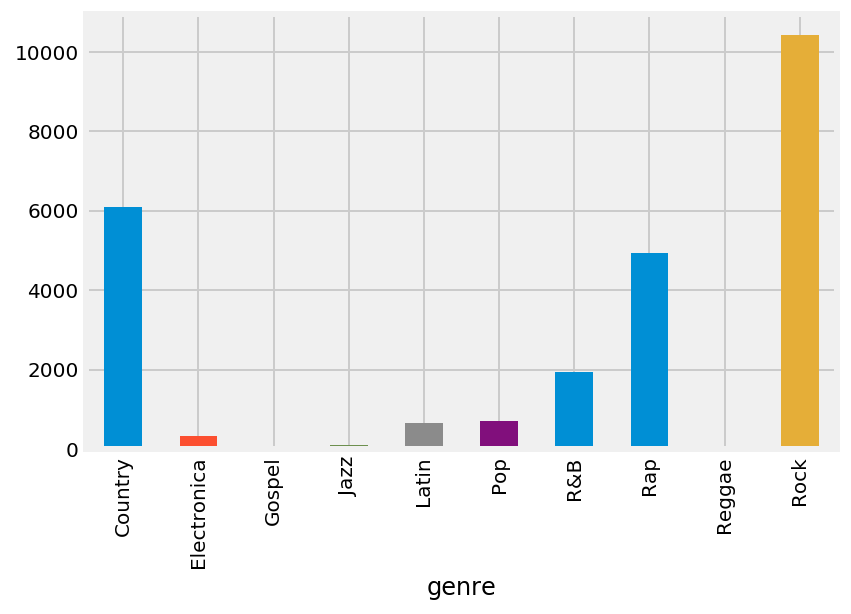

In [6]:
df.groupby('genre')['x1st.week'].sum().plot(kind = 'bar')

## Questions?

- Biggest Country Record?
- How did Carrie Underwood do?
- What were top songs in first week on charts?
- Does this mean no reggae?
- Longest lasting song on charts?

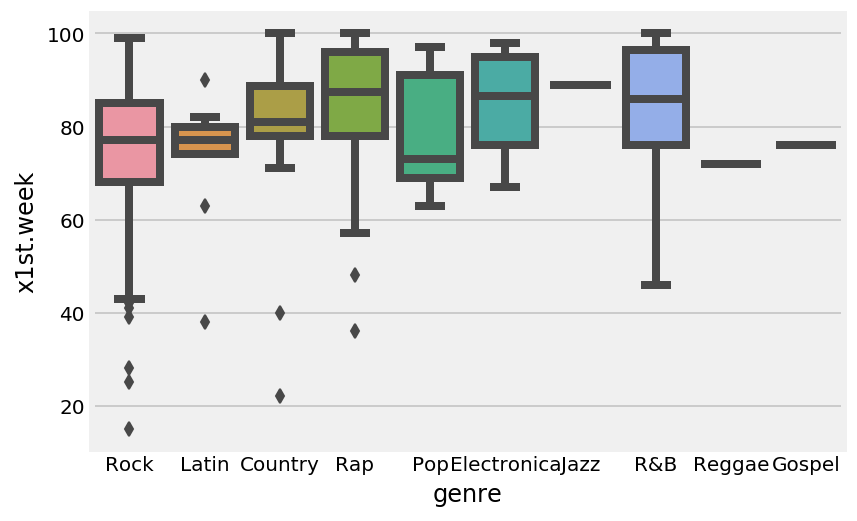

In [7]:
sns.boxplot(df.genre, df['x1st.week'])

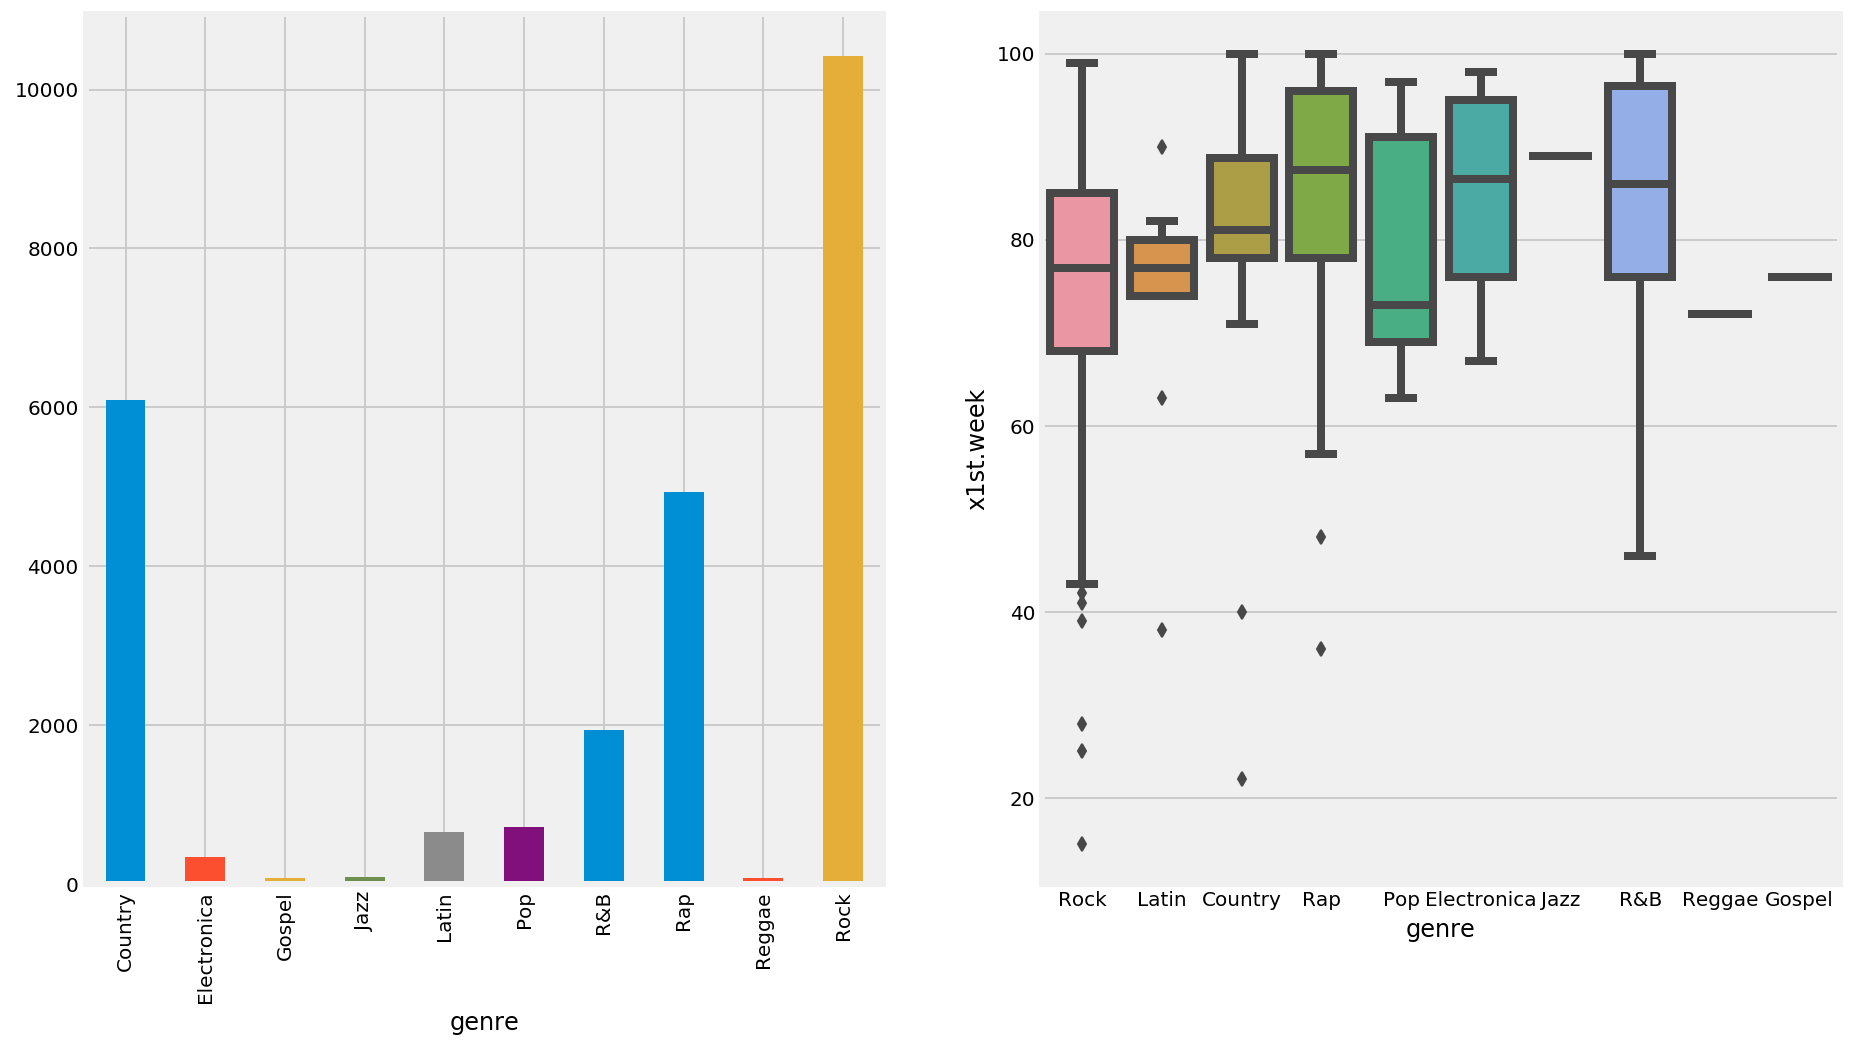

In [8]:
plt.figure(figsize = (14, 8))
plt.subplot(121)
df.groupby('genre')['x1st.week'].sum().plot(kind = 'bar')

plt.subplot(122)
sns.boxplot(df.genre, df['x1st.week'])

In [9]:
reggae = df[df['genre'] == 'Reggae']

In [10]:
reggae.shape

(1, 83)

In [17]:
reggae.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
189,2000,Beenie Man,Girls Dem Sugar,4:17,Reggae,2000-10-21,2000-12-02,72,72.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
for i in range(5):
    print('week_' + str(i))

week_0
week_1
week_2
week_3
week_4


In [35]:
df['date.entered'] = pd.to_datetime(df['date.entered'])
df['data.peaked'] = pd.to_datetime(df['date.peaked'])
df['diff_enter_peak'] = df['date.entered'] - df['date.peaked']

ValueError: format number 1 of "b'2000-11-18'" is not recognized

In [43]:
df['weeks_on_chart'] = df.iloc[:, 7:79].notnull().sum(axis = 1)

In [45]:
df.loc[:3, ['artist.inverted', 'weeks_on_chart']]

,artist.inverted,weeks_on_chart
0,Destiny's Child,28
1,Santana,26
2,Savage Garden,33
3,Madonna,24


In [60]:
jayz = df[df['artist.inverted'].str.contains('Jay-Z')]

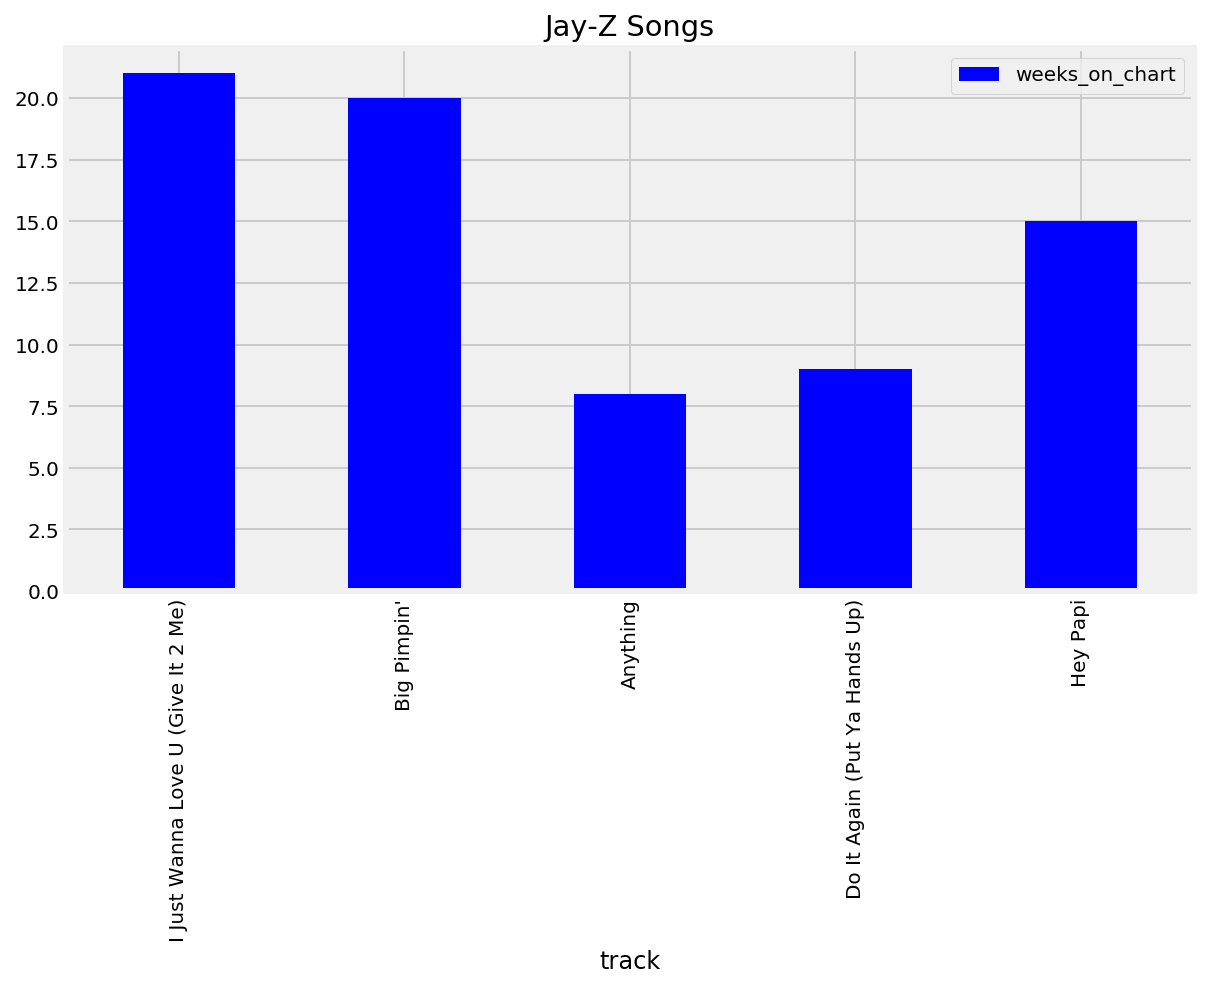

In [64]:
jayz.plot(x = 'track', y = 'weeks_on_chart', kind = 'bar', title = 'Jay-Z Songs', color = 'blue', figsize = (9, 5))

In [34]:
df[(df['date.entered'] > '2000') & (df['date.entered'] < '2002') & (df['genre'] == 'Rap')]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,data.peaked
31,2000,Eminem,The Real Slim Shady,4:42,Rap,2000-05-06,2000-06-24,70,32.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-06-24
47,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,100,99.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-16
54,2000,Ja Rule,Between Me And You,4:05,Rap,2000-09-16,2000-11-18,85,74.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-11-18
57,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,2000-10-28,2000-12-30,58,45.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-30
61,2000,Mystikal,Shake Ya Ass,4:46,Rap,2000-08-12,2000-10-28,97,90.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-28
69,2000,504 Boyz,Wobble Wobble,3:35,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-05-06
71,2000,Jay-Z,Big Pimpin',3:55,Rap,2000-04-22,2000-07-08,69,52.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-08
76,2000,Lil Bow Wow,Bounce With Me,3:22,Rap,2000-08-19,2000-09-16,48,35.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-16
82,2000,Ludacris,What's Your Fantasy,4:16,Rap,2000-09-30,2000-12-16,89,83.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-16
83,2000,Lil' Zane,Callin' Me,3:43,Rap,2000-07-29,2000-09-02,83,89.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-02


## Questions

1. Weeks on chart by genre? (how many, average, max, min)
2. Jay-Z songs and weeks on chart.
3. Top ten by artist and song. (Creed should be here twice)
4. Difference between enter and peak position. (Creed again!)



In [65]:
df.sort_values('time', ascending = False).head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,data.peaked,weeks_on_chart
49,2000,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,89,89.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-08,5
128,2000,"Iglesias, Enrique",Rhythm Divine,7:35,Latin,1999-12-04,2000-01-22,90,84.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-22,17
100,2000,D'Angelo,Untitled (How Does It Feel),7:10,R&B,2000-01-22,2000-02-19,77,56.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-19,17


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 85 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null datetime64[ns]
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week       